In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib as plt

url = "https://huggingface.co/datasets/Sp1786/multiclass-sentiment-analysis-dataset/resolve/main/train_df.csv"
df = pd.read_csv(url)
print(df.head(), df.shape)

      id                                               text  label sentiment
0   9536                    Cooking microwave pizzas, yummy      2  positive
1   6135  Any plans of allowing sub tasks to show up in ...      1   neutral
2  17697   I love the humor, I just reworded it. Like sa...      2  positive
3  14182                       naw idk what ur talkin about      1   neutral
4  17840          That sucks to hear. I hate days like that      0  negative (31232, 4)


In [2]:
df

,id,text,label,sentiment
0,9536,"Cooking microwave pizzas, yummy",2,positive
1,6135,Any plans of allowing sub tasks to show up in ...,1,neutral
2,17697,"I love the humor, I just reworded it. Like sa...",2,positive
3,14182,naw idk what ur talkin about,1,neutral
4,17840,That sucks to hear. I hate days like that,0,negative
...,...,...,...,...
31227,6265,Grrrr....I got the wrong size coat for the sheep,0,negative
31228,11284,4 cases of swine flu!,1,neutral
31229,6436,excellent,2,positive
31230,860,is sitting thru the boring bits in Titanic wai...,1,neutral


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31232 entries, 0 to 31231
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         31232 non-null  int64 
 1   text       31232 non-null  object
 2   label      31232 non-null  int64 
 3   sentiment  31232 non-null  object
dtypes: int64(2), object(2)
memory usage: 976.1+ KB
None


In [4]:
print(df['sentiment'].value_counts)

<bound method IndexOpsMixin.value_counts of 0        positive
1         neutral
2        positive
3         neutral
4        negative
           ...   
31227    negative
31228     neutral
31229    positive
31230     neutral
31231    negative
Name: sentiment, Length: 31232, dtype: object>


In [5]:
print(df['text'].value_counts)

<bound method IndexOpsMixin.value_counts of 0                          Cooking microwave pizzas, yummy
1        Any plans of allowing sub tasks to show up in ...
2         I love the humor, I just reworded it. Like sa...
3                             naw idk what ur talkin about
4                That sucks to hear. I hate days like that
                               ...                        
31227     Grrrr....I got the wrong size coat for the sheep
31228                                4 cases of swine flu!
31229                                            excellent
31230    is sitting thru the boring bits in Titanic wai...
31231                                      Missed the play
Name: text, Length: 31232, dtype: object>


In [6]:
print(df.duplicated().sum())

0


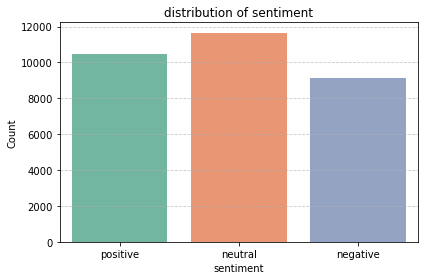

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment' ,palette='Set2')
plt.title('distribution of sentiment')
plt.ylabel('Count')
plt.xlabel('sentiment')
plt.grid(axis='y' , linestyle='--' , alpha=0.7)
plt.tight_layout()
plt.show()

In [8]:
# ضبط عرض الجمل بالكامل
pd.set_option('display.max_colwidth', None)

# تصفية الجمل الطويلة من النوع neutral
long_neutral = df[(df['sentiment'] == 'neutral') & (df['text'].str.split().str.len() > 25)]

# عرض أول 10 جمل
long_neutral[['text', 'sentiment']].head(10)

,text,sentiment
35,"Not as useful as Wunderlist... Yet!! Would prefer to have a tab for the ""week"". Not just day, that way I can anticipate. Also wish items would show up in my calendar.",neutral
66,"_peek mkay :/ did you tell him on msn? bfgurelgbsr yeah, i guess so, i don`t know if i like it, i`ll wait till i get your opinion",neutral
78,"Very nice, very simple, very usefull, but the free mode is too annoyingly limited. looking forward to having the ability to link habits with my wife or friends.",neutral
91,"The app is great, and I´ve started to use it rather than wunderlist. Just 3 stars because I don´t think the My Day section makes sense. Tasks flagged as to be done today, in others lists, should appear in My Day, as those are the tasks for Today, seems My Day only considers tasks added specifically to that list, and that makes it confusing and redundant, as in Planned, the right logic is applied, where you see planned tasks for today and ahead. Shouldn´t the same logic apply to the My Day window? Or I am doing something wrong?",neutral
97,It's really confusing! Its hadd to make routines and stuff. Just over all really confusing. But over great way to track routines. I love the tag idea. Mabey you should add a default school tag?,neutral
106,The layout for the app is awesome. But it would be better if non-routine task can be added into the timeline with the same activity for routine task.,neutral
109,My car is in the car hospital for the nxt 7 days I gotta go pick up a loaner car b4 6! Bein without wheels 4 7day will set me back heavy!,neutral
111,Only 24hr option? no 12. Would be cool if you could color code the circles in the calendar date to that calendar that has an event for that day.,neutral
115,"This task app is the only decent option I've found for combining tasks and calendar events into one scrollable widget. Tasks can be set to repeat from the date completed, which is essential for things like haircuts and cleaning schedules. Unfortunately, neither the app nor the widget (which is especially important) has many customization options. One option I would like, in particular, is the ability to hide the widget's title bar. Obviously color and display options would be nice, too.",neutral
127,It's actually good but it doesn't have a feature where your task appears on your lockscreen that will remind you everytime you forgot something to do.,neutral


In [9]:
import pandas as pd
import re

# دالة تنظيف النصوص
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    # استبدال النقاط . وال= و ؟ و ! بمسافة
    text = re.sub(r'[.=؟!]', ' ', text)
    # حذف الأرقام
    text = re.sub(r'\d+', '', text)
    # حذف كل علامات الترقيم الأخرى (كل شيء ليس حرف أو رقم أو مسافة)
    text = re.sub(r'[^\w\sء-ي]', '', text)
    # حذف المسافات المتكررة وتحويلها لمسافة واحدة
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# إنشاء عمود جديد للنصوص النظيفة
df['cleaned_text'] = df['text'].apply(clean_text)

# عرض أول 5 صفوف للتأكد
print(df[['text', 'cleaned_text']].head())

                                                                                                                               text  \
0                                                                                                   Cooking microwave pizzas, yummy   
1                                                                         Any plans of allowing sub tasks to show up in the widget?   
2   I love the humor, I just reworded it. Like saying 'group therapy' instead`a 'gang banging'. Keeps my moms off my back.   Hahaha   
3                                                                                                      naw idk what ur talkin about   
4                                                                                         That sucks to hear. I hate days like that   

                                                                                                           cleaned_text  
0                                                                  

In [10]:
df

,id,text,label,sentiment,cleaned_text
0,9536,"Cooking microwave pizzas, yummy",2,positive,cooking microwave pizzas yummy
1,6135,Any plans of allowing sub tasks to show up in the widget?,1,neutral,any plans of allowing sub tasks to show up in the widget
2,17697,"I love the humor, I just reworded it. Like saying 'group therapy' instead`a 'gang banging'. Keeps my moms off my back. Hahaha",2,positive,i love the humor i just reworded it like saying group therapy insteada gang banging keeps my moms off my back hahaha
3,14182,naw idk what ur talkin about,1,neutral,naw idk what ur talkin about
4,17840,That sucks to hear. I hate days like that,0,negative,that sucks to hear i hate days like that
...,...,...,...,...,...
31227,6265,Grrrr....I got the wrong size coat for the sheep,0,negative,grrrr i got the wrong size coat for the sheep
31228,11284,4 cases of swine flu!,1,neutral,cases of swine flu
31229,6436,excellent,2,positive,excellent
31230,860,is sitting thru the boring bits in Titanic waiting for the good bit to start in couple of hours,1,neutral,is sitting thru the boring bits in titanic waiting for the good bit to start in couple of hours


In [11]:
# عدد الأسطر التي cleaned_text فارغ أو null
empty_or_null_count = df['cleaned_text'].isnull().sum() + (df['cleaned_text'].str.strip() == '').sum()

print(f"عدد الأسطر التي cleaned_text فارغ أو null: {empty_or_null_count}")

عدد الأسطر التي cleaned_text فارغ أو null: 11


In [12]:
empty_or_null_rows = df[df['cleaned_text'].isnull() | (df['cleaned_text'].str.strip() == '')]

print(empty_or_null_rows[['text', 'cleaned_text']])

                  text cleaned_text
3986                 😍             
6865               🙄🙄🙄             
7403   😐😐😘😘😘😘😘😘😘😘😘😘😘😘😘             
13410               ♡♡             
22788             😶😶😶😶             
23166                💖             
24174                😀             
26336            👍👍😎😎😎             
29812                👍             
30022                🐂             
31009             ****             


In [13]:
df = df[~(df['cleaned_text'].isnull() | (df['cleaned_text'].str.strip() == ''))].reset_index(drop=True)

In [14]:
empty_or_null_rows = df[df['cleaned_text'].isnull() | (df['cleaned_text'].str.strip() == '')]

print(empty_or_null_rows[['text', 'cleaned_text']])

Empty DataFrame
Columns: [text, cleaned_text]
Index: []


In [15]:
import re
from nltk.corpus import stopwords
import nltk

# تحميل كلمات التوقف إذا لم تكن محملة مسبقاً
nltk.download('stopwords')

arabic_stopwords = set(stopwords.words('arabic'))
english_stopwords = set(stopwords.words('english'))

def reduce_repeated_letters(word):
    # تقليل الحروف المتكررة المتتالية إلى حرفين كحد أقصى
    return re.sub(r'(.)\1{2,}', r'\1\1', word)

def preprocess_advanced(text):
    if not isinstance(text, str):
        return ""
    
    # تقليل التكرار في كل كلمة داخل النص
    words = text.split()
    words = [reduce_repeated_letters(word) for word in words]
    
    # حذف كلمات التوقف (stopwords) الإنجليزية والعربية مع الاحتفاظ بكلمات مهمة مثل 'not' و 'no'
    filtered_words = []
    for w in words:
        lw = w.lower()
        if lw in ['not', 'no', 'never', 'none', "n't"]:  # كلمات نفي مهمة للاحساس
            filtered_words.append(w)
        elif (lw not in english_stopwords) and (lw not in arabic_stopwords):
            filtered_words.append(w)
    return ' '.join(filtered_words)

# تطبيقها على عمود cleaned_text الحالي
df['cleaned_text_2'] = df['cleaned_text'].apply(preprocess_advanced)

# عرض النتائج للمقارنة
print(df[['cleaned_text', 'cleaned_text_2']].head(10))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\heith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                                                                           cleaned_text  \
0                                                                                        cooking microwave pizzas yummy   
1                                                              any plans of allowing sub tasks to show up in the widget   
2  i love the humor i just reworded it like saying group therapy insteada gang banging keeps my moms off my back hahaha   
3                                                                                          naw idk what ur talkin about   
4                                                                              that sucks to hear i hate days like that   
5                                             umm yeah thats probably a pretty good note to self because eeeeeewwwwwwww   
6                                                                                                  whatever do you mean   
7               

In [16]:
import re
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

arabic_stopwords = set(stopwords.words('arabic'))
english_stopwords = set(stopwords.words('english'))

# كلمات ضوضاء شائعة تحذف بالكامل لأنها غير مفيدة
noise_words = set([
    'hahaha', 'haha', 'hehe', 'lol', 'ugh', 'hmm', 'eww', 'ew', 'ah', 'oh', 'mm', 'mmm',
    'ha', 'hee', 'heehee', 'hoho', 'huh', 'haah', 'hahaha', 'hehehe'
])

def reduce_repeated_letters(word):
    # تقليل التكرار إلى حرفين كحد أقصى
    return re.sub(r'(.)\1{2,}', r'\1\1', word)

def is_noise_word(word):
    # نزيل الكلمات اللي كلها حرف واحد متكرر مثل: aaa, eee, ooo
    if re.fullmatch(r'(.)\1+', word):
        return True
    # نزيل الكلمات في قائمة noise_words
    if word.lower() in noise_words:
        return True
    return False

def preprocess_advanced(text):
    if not isinstance(text, str):
        return ""
    
    words = text.split()
    cleaned_words = []
    
    for w in words:
        # نزيل الكلمات الضوضاء أولاً
        if is_noise_word(w):
            continue
        
        # نقلل التكرار داخل الكلمة
        w_reduced = reduce_repeated_letters(w)
        
        lw = w_reduced.lower()
        # نحذف كلمات التوقف (ما عدا كلمات النفي المهمة)
        if lw in ['not', 'no', 'never', 'none', "n't"]:
            cleaned_words.append(w_reduced)
        elif (lw not in english_stopwords) and (lw not in arabic_stopwords):
            cleaned_words.append(w_reduced)
    
    return ' '.join(cleaned_words)

# تطبيق على cleaned_text
df['cleaned_text_3'] = df['cleaned_text'].apply(preprocess_advanced)

# عرض الفرق
print(df[['cleaned_text', 'cleaned_text_3']].head(10))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\heith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                                                                           cleaned_text  \
0                                                                                        cooking microwave pizzas yummy   
1                                                              any plans of allowing sub tasks to show up in the widget   
2  i love the humor i just reworded it like saying group therapy insteada gang banging keeps my moms off my back hahaha   
3                                                                                          naw idk what ur talkin about   
4                                                                              that sucks to hear i hate days like that   
5                                             umm yeah thats probably a pretty good note to self because eeeeeewwwwwwww   
6                                                                                                  whatever do you mean   
7               

In [17]:
import re

def contains_non_english(text):
    if not isinstance(text, str):
        return False
    # البحث عن أي حرف غير الحروف الإنجليزية الكبيرة والصغيرة أو مسافة أو علامات ترقيم شائعة
    # هنا نسمح فقط بالحروف الإنجليزية a-z, A-Z، والمسافات وبعض علامات الترقيم البسيطة
    pattern = re.compile(r'[^a-zA-Z\s.,?!]')
    return bool(pattern.search(text))

# تصفية الأسطر التي تحتوي على لغة غير إنجليزية
non_english_rows = df[df['cleaned_text'].apply(contains_non_english)]

print(f"عدد الأسطر التي تحتوي على لغة غير الإنجليزية: {len(non_english_rows)}")

# عرض بعض منها
print(non_english_rows[['text', 'cleaned_text']].head(10))

عدد الأسطر التي تحتوي على لغة غير الإنجليزية: 1364
                                                                                                                                  text  \
25                                                              _NZ busy,fun mother`s day thanks  got what I wanted...a Wii Fit!!! Yay   
28                                                                                                              _by_spork we shall see   
33                                                                                                              @_missrachel how much?   
66   _peek mkay :/ did you tell him on msn? bfgurelgbsr yeah, i guess so, i don`t know if i like it, i`ll wait till i get your opinion   
74                                                                                                                  @_Freya Good Night   
102               _nicole http://twitpic.com/4t6qx - i have the exact same pic except it`s my hubby & my chihuahua tucker

In [18]:
def further_clean(text):
    if not isinstance(text, str):
        return ''
    # إزالة الروابط
    text = re.sub(r'http\S+', '', text)
    # إزالة كلمات تبدأ بـ @ أو _
    text = re.sub(r'[@_]\w+', '', text)
    # إزالة الكلمات التي تحتوي على رموز غير حروف وأرقام (مثلاً bfgurelgbsr من الصعب الحكم عليها)
    text = ' '.join([w for w in text.split() if re.match(r'^[a-zA-Z]+$', w)])
    # حذف مسافات متكررة
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_text_final'] = df['cleaned_text_3'].apply(further_clean)

# الآن نطبع بعض الأمثلة لنرى النتيجة
print(df[['cleaned_text_3', 'cleaned_text_final']].head(10))

                                                                        cleaned_text_3  \
0                                                       cooking microwave pizzas yummy   
1                                                 plans allowing sub tasks show widget   
2  love humor reworded like saying group therapy insteada gang banging keeps moms back   
3                                                                    naw idk ur talkin   
4                                                            sucks hear hate days like   
5                                   umm yeah thats probably pretty good note self eeww   
6                                                                        whatever mean   
7                           would panic little maybe read orbitron gym like else fails   
8                                                              sad peoples phones dead   
9                                                                             sad face   

         

In [19]:
import re

def contains_non_english(text):
    if not isinstance(text, str):
        return False
    # البحث عن أي حرف غير الحروف الإنجليزية الكبيرة والصغيرة أو مسافة أو علامات ترقيم شائعة
    # هنا نسمح فقط بالحروف الإنجليزية a-z, A-Z، والمسافات وبعض علامات الترقيم البسيطة
    pattern = re.compile(r'[^a-zA-Z\s.,?!]')
    return bool(pattern.search(text))

# تصفية الأسطر التي تحتوي على لغة غير إنجليزية
non_english_rows = df[df['cleaned_text'].apply(contains_non_english)]

print(f"عدد الأسطر التي تحتوي على لغة غير الإنجليزية: {len(non_english_rows)}")

# عرض بعض منها
print(non_english_rows[['text', 'cleaned_text_final']].head(10))

عدد الأسطر التي تحتوي على لغة غير الإنجليزية: 1364
                                                                                                                                  text  \
25                                                              _NZ busy,fun mother`s day thanks  got what I wanted...a Wii Fit!!! Yay   
28                                                                                                              _by_spork we shall see   
33                                                                                                              @_missrachel how much?   
66   _peek mkay :/ did you tell him on msn? bfgurelgbsr yeah, i guess so, i don`t know if i like it, i`ll wait till i get your opinion   
74                                                                                                                  @_Freya Good Night   
102               _nicole http://twitpic.com/4t6qx - i have the exact same pic except it`s my hubby & my chihuahua tucker

In [20]:
import re

# دالة لفحص إذا الكلمة صالحة: فقط أحرف a-z أو A-Z وطولها 3 أحرف أو أكثر
def is_valid_word(word):
    return re.fullmatch(r'[a-zA-Z]{3,}', word) is not None

# دالة تنظيف إضافية: حذف الكلمات غير الصالحة
def clean_more(text):
    if not isinstance(text, str):
        return ''
    words = text.split()
    valid_words = [w for w in words if is_valid_word(w)]
    return ' '.join(valid_words)

# دالة حذف بقايا أجزاء الروابط الغريبة (مثال: comtqx أو كلمات قصيرة مش واضحة)
def clean_links(text):
    if not isinstance(text, str):
        return ''
    # حذف كلمات محددة غير مفيدة (يمكن إضافة كلمات أخرى حسب الحاجة)
    text = re.sub(r'\b\w{1,3}tqx\b', '', text)
    text = re.sub(r'\b\w{1,3}com\b', '', text)
    # حذف مسافات متكررة بعد التنظيف
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# تطبيق التنظيفات المتتابعة
df['cleaned_text_final2'] = df['cleaned_text_final'].apply(clean_more)
df['cleaned_text_final2'] = df['cleaned_text_final2'].apply(clean_links)

# حذف الجمل القصيرة جدا (أقل من 3 كلمات)
df = df[df['cleaned_text_final2'].str.split().apply(len) >= 3].reset_index(drop=True)

# عرض عينة من النتائج النهائية
print(df[['cleaned_text_final', 'cleaned_text_final2']].head(10))
print(f"عدد الأسطر بعد التنظيف النهائي وحذف الجمل القصيرة: {len(df)}")

                                                                       cleaned_text_final  \
0                                                          cooking microwave pizzas yummy   
1                                                    plans allowing sub tasks show widget   
2     love humor reworded like saying group therapy insteada gang banging keeps moms back   
3                                                                       naw idk ur talkin   
4                                                               sucks hear hate days like   
5                                      umm yeah thats probably pretty good note self eeww   
6                              would panic little maybe read orbitron gym like else fails   
7                                                                 sad peoples phones dead   
8  cafe management end month nothing numbers arty little head hurts finding discrepencies   
9                                  basically ive listened miley cyrus 

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. تحضير البيانات
X = df['cleaned_text_final2']
y = df['label']  # غيّر هذا حسب اسم عمود التصنيف لديك

# 2. تقسيم البيانات (مثلاً 80% تدريب - 20% اختبار)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. تحويل النصوص إلى تمثيل رقمي باستخدام TF-IDF
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 4. تدريب نموذج الانحدار اللوجستي
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# 5. التنبؤ على بيانات الاختبار
y_pred = model.predict(X_test_tfidf)

# 6. تقييم الأداء
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6595974119338606

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.63      0.65      1664
           1       0.57      0.61      0.59      1998
           2       0.77      0.74      0.75      1902

    accuracy                           0.66      5564
   macro avg       0.67      0.66      0.66      5564
weighted avg       0.66      0.66      0.66      5564



In [22]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

# نستخدم نفس البيانات المحضرة سابقاً X_train_tfidf, y_train, X_test_tfidf, y_test

# بناء وتدريب نموذج SVM
svm_model = LinearSVC(max_iter=2000)
svm_model.fit(X_train_tfidf, y_train)

# التنبؤ على بيانات الاختبار
y_pred_svm = svm_model.predict(X_test_tfidf)

# تقييم النموذج
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.6376707404744788

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.64      0.64      1664
           1       0.55      0.55      0.55      1998
           2       0.73      0.73      0.73      1902

    accuracy                           0.64      5564
   macro avg       0.64      0.64      0.64      5564
weighted avg       0.64      0.64      0.64      5564



In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# بناء نموذج Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# التنبؤ على بيانات الاختبار
y_pred_rf = rf_model.predict(X_test_tfidf)

# تقييم النموذج
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.6561826024442847

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.61      0.63      1664
           1       0.59      0.58      0.58      1998
           2       0.72      0.78      0.75      1902

    accuracy                           0.66      5564
   macro avg       0.66      0.66      0.65      5564
weighted avg       0.65      0.66      0.65      5564



In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# حساب أوزان الفئات تلقائيًا
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

# تدريب نموذج Logistic Regression مع أوزان الفئات
model_weighted = LogisticRegression(max_iter=1000, class_weight=class_weight_dict)
model_weighted.fit(X_train_tfidf, y_train)

# التنبؤ والتقييم
y_pred_weighted = model_weighted.predict(X_test_tfidf)

from sklearn.metrics import classification_report, accuracy_score
print("Weighted Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_weighted))
print("\nClassification Report:\n", classification_report(y_test, y_pred_weighted))

Weighted Logistic Regression Accuracy: 0.6612149532710281

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.68      0.66      1664
           1       0.58      0.57      0.57      1998
           2       0.77      0.74      0.75      1902

    accuracy                           0.66      5564
   macro avg       0.66      0.66      0.66      5564
weighted avg       0.66      0.66      0.66      5564



In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# تحويل النصوص إلى تمثيل رقمي باستخدام TF-IDF
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(df['cleaned_text_final2'])

# تقسيم البيانات إلى تدريب واختبار
X_train_vec, X_test_vec, y_train, y_test = train_test_split(X_vec, df['label'], test_size=0.2, random_state=42)

# إنشاء وتدريب نموذج Random Forest مع موازنة الفئات
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
rf_model.fit(X_train_vec, y_train)

# التنبؤ على مجموعة الاختبار
y_pred_rf = rf_model.predict(X_test_vec)

# تقييم الأداء
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy (Random Forest): 0.6675053918044572
              precision    recall  f1-score   support

           0       0.65      0.63      0.64      1592
           1       0.61      0.61      0.61      2049
           2       0.74      0.76      0.75      1923

    accuracy                           0.67      5564
   macro avg       0.67      0.67      0.67      5564
weighted avg       0.67      0.67      0.67      5564



In [26]:
# حساب طول كل جملة في cleaned_text_final
df['text_length'] = df['cleaned_text_final'].apply(lambda x: len(x.split()))

# عرض الجمل التي تحتوي على أكثر من 100 كلمة (أو عدل العدد حسب حاجتك)
long_sentences = df[df['text_length'] > 100]

# عرض النتائج
print(f"عدد الجمل الطويلة جدًا: {len(long_sentences)}")
long_sentences[['cleaned_text_final', 'text_length']].head(10)  # عرض أول 10 منها

عدد الجمل الطويلة جدًا: 5


,cleaned_text_final,text_length
938,requires account use giving simple reason didnt like since response indicates dont seconds ill waist minutes make understand point requires account dont need another stinking account keep track task list wanted share multiple devices would use number desktop applications already dont need another stinking program tracking business sake backing data make available everywhere covered already wanted simple task list small price use phone without choice no thanks act though seconds give privacy no big deal well information data not business one else unless decide want need understand customers like options something not something stuffed throat downloaded tasks todo list happy donated developer making app not self,106
8589,rereview could best habit tracker goal setter task manager really great features like nested lists smartauto grouping versatile repeat task setup dont confuse game rpg actual gameplay elaborate character design advancement system deserves recognition allowing well rounded unique hero grows every task performed users daily life however hamstring overlooking important integral functionality firstly no way order tasks set groups solid month use building projects subtasks subtasks setting several habit based routines lack prioritisation task ordering created confusing clutter items looked no different next autogrouping smart grouping able help sort lack ability user remove task groups meant every task appeared losing important ones clutter user defined groups could contain items specifically placed large project number different aspects not ordered sensible linear series no social aspect currently attached app ver no task sharing also no designated pcmaclinux front end desktop syncing finally expensive apps go one get full version month paid yearly removes ads gives calendar access original review good way make tedium self regulation bit fun able plan skip things away regular activities handy would nice see characteristic skill based modifiers affect related task improvements raise subtask attached leader,188
15419,love program definitely improvement google calendar easy moving back forth dates using go feature huge plus book short comings irritating least use calendar keep track lists save description field first editing features bolding underlining line numbering etc dont appear anywhere unless like case accidently discover couple steps bizarre gymnastics found loved features however first thing annoying long list things go past one screen keep scrolling access features would nice button tab would open stationary bar top floating window moves screen second issue definitely software bug line numbering line numbering list established want go back add new line change priority moving things system odd things,104
18872,true nonpremium version soon loose way backuprestore transfer another phone not true please point backuprestore way stays app future thanks lot true really bad news backup basic necessity nonpremium version become practically useless long term addition premium costs twice much single year lets say osmand eternity much complex app free version completely usable within reasonable limits tasks really nice app except swichingt sublistslists unreasonably slow unique essential features wracks drive away possibly others not fair move reduce base functionality like response steven nottages response fair enough except one important detail people using free app forced decide want meaningful app pay search another app premium app add features not restrict free apps capabilities add worthwhile features fair pricing people buy lots people spent time set tasking system app right properties looks like lured using app forcing pay payed number apps cheaper btw actually plan paydonate soon slowness switching task lists disappear thought app really useful deserves support change different not mean not ask payment cloud backup etc not remove free local backup feature omitted free version 

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. تحويل النصوص إلى TF-IDF
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_tfidf = vectorizer.fit_transform(df['cleaned_text_final2'])

# 2. تقليل الأبعاد باستخدام LSA (SVD)
svd = TruncatedSVD(n_components=300, random_state=42)  # عدد المكونات يمكن تعديله
X_lsa = svd.fit_transform(X_tfidf)

# 3. تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X_lsa, df['label'], test_size=0.2, random_state=42, stratify=df['label'])

# 4. تدريب نموذج Random Forest
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# 5. التنبؤ والتقييم
y_pred = rf.predict(X_test)
print("Accuracy with LSA + RF:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy with LSA + RF: 0.5905823148813804
              precision    recall  f1-score   support

           0       0.60      0.48      0.53      1664
           1       0.50      0.60      0.55      1998
           2       0.70      0.68      0.69      1902

    accuracy                           0.59      5564
   macro avg       0.60      0.59      0.59      5564
weighted avg       0.60      0.59      0.59      5564



In [28]:
from transformers import pipeline
import torch

# تحميل نموذج تصنيف المشاعر متعدد اللغات
classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# تجربة على أول 5 جمل من بياناتك
texts = df['cleaned_text_final2'].tolist()[:5]

results = classifier(texts)

for text, res in zip(texts, results):
    print(f"Text: {text}\nPrediction: {res}\n")

C:\Users\heith\AppData\Roaming\Python\Python39\site-packages\transformers\utils\generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
W0720 16:15:03.492435 11360 Anaconda3\Lib\site-packages\torch\distributed\elastic\multiprocessing\redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.
C:\Users\heith\AppData\Roaming\Python\Python39\site-packages\transformers\utils\generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
C:\Users\heith\Anaconda3\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warni

Text: cooking microwave pizzas yummy
Prediction: {'label': '5 stars', 'score': 0.45247095823287964}

Text: plans allowing sub tasks show widget
Prediction: {'label': '4 stars', 'score': 0.39257773756980896}

Text: love humor reworded like saying group therapy insteada gang banging keeps moms back
Prediction: {'label': '1 star', 'score': 0.3562270402908325}

Text: naw idk talkin
Prediction: {'label': '3 stars', 'score': 0.2543209493160248}

Text: sucks hear hate days like
Prediction: {'label': '1 star', 'score': 0.7629766464233398}



In [29]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 59.06%


In [30]:
df

,id,text,label,sentiment,cleaned_text,cleaned_text_2,cleaned_text_3,cleaned_text_final,cleaned_text_final2,text_length
0,9536,"Cooking microwave pizzas, yummy",2,positive,cooking microwave pizzas yummy,cooking microwave pizzas yummy,cooking microwave pizzas yummy,cooking microwave pizzas yummy,cooking microwave pizzas yummy,4
1,6135,Any plans of allowing sub tasks to show up in the widget?,1,neutral,any plans of allowing sub tasks to show up in the widget,plans allowing sub tasks show widget,plans allowing sub tasks show widget,plans allowing sub tasks show widget,plans allowing sub tasks show widget,6
2,17697,"I love the humor, I just reworded it. Like saying 'group therapy' instead`a 'gang banging'. Keeps my moms off my back. Hahaha",2,positive,i love the humor i just reworded it like saying group therapy insteada gang banging keeps my moms off my back hahaha,love humor reworded like saying group therapy insteada gang banging keeps moms back hahaha,love humor reworded like saying group therapy insteada gang banging keeps moms back,love humor reworded like saying group therapy insteada gang banging keeps moms back,love humor reworded like saying group therapy insteada gang banging keeps moms back,13
3,14182,naw idk what ur talkin about,1,neutral,naw idk what ur talkin about,naw idk ur talkin,naw idk ur talkin,naw idk ur talkin,naw idk talkin,4
4,17840,That sucks to hear. I hate days like that,0,negative,that sucks to hear i hate days like that,sucks hear hate days like,sucks hear hate days like,sucks hear hate days like,sucks hear hate days like,5
...,...,...,...,...,...,...,...,...,...,...
27812,21962,has found a free wifi point ... and it`s sunny,2,positive,has found a free wifi point and its sunny,found free wifi point sunny,found free wifi point sunny,found free wifi point sunny,found free wifi point sunny,5
27813,7737,"This apps quite easy to use and looks simple. Just it doesn't really meet my requirements, it can be better if it got the calendar and tickbox. I've purchased it but it still like the same. It said sync to my calendar but it didn't shows what I've planned in my google calendar. The only thing I am satisfield is the notification sounds.",2,positive,this apps quite easy to use and looks simple just it doesnt really meet my requirements it can be better if it got the calendar and tickbox ive purchased it but it still like the same it said sync to my calendar but it didnt shows what ive planned in my google calendar the only thing i am satisfield is the notification sounds,apps quite easy use looks simple doesnt really meet requirements better got calendar tickbox ive purchased still like said sync calendar didnt shows ive planned google calendar thing satisfield notification sounds,apps quite easy use looks simple doesnt really meet requirements better got calendar tickbox ive purchased still like said sync calendar didnt shows ive planned google calendar thing satisfield notification sounds,apps quite easy use looks simple doesnt really meet requirements better got calendar tickbox ive purchased still like said sync calendar didnt shows ive planned google calendar thing satisfield notification sounds,apps quite easy use looks simple doesnt really meet requirements better got calendar tickbox ive purchased still like said sync calendar didnt shows ive planned google calendar thing satisfield notification sounds,31
27814,6265,Grrrr....I got the wrong size coat for the sheep,0,negative,grrrr i got the wrong size coat for the sheep,grr got wrong size coat sheep,grr got wrong size coat sheep,grr got wrong size coat sheep,grr got wrong size coat sheep,6
27815,11284,4 cases of swine flu!,1,neutral,cases of swine flu,cases swine flu,cases swine flu,cases swine flu,cases swine flu,3


In [31]:
def filter_text_length(df, column, min_words=3, max_words=50):
    # احسب عدد الكلمات لكل نص
    df['word_count'] = df[column].apply(lambda x: len(str(x).split()))
    
    # احتفظ فقط بالجمل ذات الطول المناسب
    df_filtered = df[(df['word_count'] >= min_words) & (df['word_count'] <= max_words)].copy()
    
    # احذف العمود المؤقت
    df_filtered.drop(columns=['word_count'], inplace=True)
    
    return df_filtered

# استخدام الدالة
df = filter_text_length(df, 'cleaned_text_final2')

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# تحويل النصوص إلى تمثيل رقمي باستخدام TF-IDF
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(df['cleaned_text_final2'])

# تقسيم البيانات إلى تدريب واختبار
X_train_vec, X_test_vec, y_train, y_test = train_test_split(X_vec, df['label'], test_size=0.2, random_state=42)

# إنشاء وتدريب نموذج Random Forest مع موازنة الفئات
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
rf_model.fit(X_train_vec, y_train)

# التنبؤ على مجموعة الاختبار
y_pred_rf = rf_model.predict(X_test_vec)

# تقييم الأداء
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy (Random Forest): 0.6515069482042952
              precision    recall  f1-score   support

           0       0.68      0.58      0.62      1687
           1       0.56      0.62      0.59      1937
           2       0.72      0.75      0.74      1917

    accuracy                           0.65      5541
   macro avg       0.66      0.65      0.65      5541
weighted avg       0.66      0.65      0.65      5541



In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. تحويل النصوص إلى TF-IDF
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_tfidf = vectorizer.fit_transform(df['cleaned_text_final2'])

# 2. تقليل الأبعاد باستخدام LSA (SVD)
svd = TruncatedSVD(n_components=300, random_state=42)  # عدد المكونات يمكن تعديله
X_lsa = svd.fit_transform(X_tfidf)

# 3. تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X_lsa, df['label'], test_size=0.2, random_state=42, stratify=df['label'])

# 4. تدريب نموذج Random Forest
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# 5. التنبؤ والتقييم
y_pred = rf.predict(X_test)
print("Accuracy with LSA + RF:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy with LSA + RF: 0.586897671900379
              precision    recall  f1-score   support

           0       0.62      0.46      0.53      1655
           1       0.50      0.61      0.55      1990
           2       0.68      0.67      0.68      1896

    accuracy                           0.59      5541
   macro avg       0.60      0.58      0.58      5541
weighted avg       0.60      0.59      0.59      5541



In [34]:
from transformers import pipeline
import torch

# تحميل نموذج تصنيف المشاعر متعدد اللغات
classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# تجربة على أول 5 جمل من بياناتك
texts = df['cleaned_text_final2'].tolist()[:5]

results = classifier(texts)

for text, res in zip(texts, results):
    print(f"Text: {text}\nPrediction: {res}\n")
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

C:\Users\heith\Anaconda3\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Text: cooking microwave pizzas yummy
Prediction: {'label': '5 stars', 'score': 0.45247095823287964}

Text: plans allowing sub tasks show widget
Prediction: {'label': '4 stars', 'score': 0.39257773756980896}

Text: love humor reworded like saying group therapy insteada gang banging keeps moms back
Prediction: {'label': '1 star', 'score': 0.3562270402908325}

Text: naw idk talkin
Prediction: {'label': '3 stars', 'score': 0.2543209493160248}

Text: sucks hear hate days like
Prediction: {'label': '1 star', 'score': 0.7629766464233398}

Accuracy: 58.69%


In [35]:
# حساب النسبة لكل فئة بعد التصفية
label_distribution = df['label'].value_counts(normalize=True) * 100
print("نسبة كل فئة:")
print(label_distribution)

نسبة كل فئة:
1    35.915391
2    34.211666
0    29.872943
Name: label, dtype: float64


In [36]:
import pandas as pd
import re

# دالة لتحديد الجمل الضوضائية أو غير الواضحة
def is_noisy(text):
    if len(text.split()) < 3:  # قصيرة جدًا
        return True
    if len(text.split()) > 40:  # طويلة جدًا
        return True
    if re.search(r"[^\w\s]{4,}", text):  # رموز كثيرة مثل !!!!! أو ####
        return True
    if re.search(r"(.)\1{3,}", text):  # تكرار حرف أكثر من 3 مرات مثل lmaooo
        return True
    return False

# ننسخ DataFrame الأصلي (غير ضروري إذا كنت تريد التعديل عليه مباشرة)
df_filtered = df.copy()

# استخراج فئة "neutral"
neutral_df = df_filtered[df_filtered['label'] == 'neutral']

# استخراج الجمل الضوضائية فقط من neutral
noisy_neutral_df = neutral_df[neutral_df['cleaned_text_final2'].apply(is_noisy)]

# عدد العناصر التي سنحذفها (25%)
n_to_remove = int(0.25 * len(neutral_df))

# نأخذ أول n جملة ضوضائية
to_remove = noisy_neutral_df.head(n_to_remove)

# حذف الجمل المختارة من df
df_filtered = df_filtered.drop(to_remove.index)

# عرض النسب الجديدة لكل فئة
new_distribution = df_filtered['label'].value_counts(normalize=True) * 100
print("🔢 توزيع الفئات بعد تصفية neutral الضوضائي بنسبة 25%:\n")
print(new_distribution)

🔢 توزيع الفئات بعد تصفية neutral الضوضائي بنسبة 25%:

1    35.915391
2    34.211666
0    29.872943
Name: label, dtype: float64


In [37]:
import pandas as pd

# عدد العينات التي سنحذفها من neutral
neutral_df = df[df['sentiment'] == 'neutral']
n_to_remove = int(0.25 * len(neutral_df))

# أخذ عينات عشوائية للحذف
to_remove = neutral_df.sample(n=n_to_remove, random_state=42)

# حذف العينات من df الأصلي
df_reduced = df.drop(to_remove.index)

# طباعة التوزيع الجديد للفئات
new_distribution = df_reduced['label'].value_counts(normalize=True) * 100
print("✅ توزيع الفئات بعد تقليل neutral بنسبة 25%:")
print(new_distribution)

✅ توزيع الفئات بعد تقليل neutral بنسبة 25%:
2    37.585756
0    32.819130
1    29.595114
Name: label, dtype: float64


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# تحويل النصوص إلى تمثيل رقمي باستخدام TF-IDF
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(df['cleaned_text_final2'])

# تقسيم البيانات إلى تدريب واختبار
X_train_vec, X_test_vec, y_train, y_test = train_test_split(X_vec, df['label'], test_size=0.2, random_state=42)

# إنشاء وتدريب نموذج Random Forest مع موازنة الفئات
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
rf_model.fit(X_train_vec, y_train)

# التنبؤ على مجموعة الاختبار
y_pred_rf = rf_model.predict(X_test_vec)

# تقييم الأداء
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy (Random Forest): 0.6515069482042952
              precision    recall  f1-score   support

           0       0.68      0.58      0.62      1687
           1       0.56      0.62      0.59      1937
           2       0.72      0.75      0.74      1917

    accuracy                           0.65      5541
   macro avg       0.66      0.65      0.65      5541
weighted avg       0.66      0.65      0.65      5541



In [40]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from datasets import Dataset
import pandas as pd
import numpy as np
import torch
from transformers import TrainingArguments

help(TrainingArguments)

# 2. حذف القيم الفارغة والتكرارات
df.dropna(subset=['text', 'sentiment'], inplace=True)
df.drop_duplicates(inplace=True)

# 3. تحويل الفئات إلى أرقام
label2id = {'negative': 0, 'neutral': 1, 'positive': 2}
df['label'] = df['sentiment'].map(label2id)

# 4. تقسيم البيانات
train_df, test_df = train_test_split(df[['text', 'label']], test_size=0.2, random_state=42)

# 5. تحويل إلى Dataset
train_ds = Dataset.from_pandas(train_df)
test_ds = Dataset.from_pandas(test_df)

# 6. تحميل التوكنيزر
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def tokenize(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=128)

train_ds = train_ds.map(tokenize, batched=True)
test_ds = test_ds.map(tokenize, batched=True)

# 7. تحميل النموذج
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

# 8. إعدادات التدريب
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    logging_dir="./logs",
    logging_steps=100,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    save_total_limit=1,
    report_to="none"
)

# 9. دالة التقييم
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    acc = (preds == labels).mean()
    return {"accuracy": acc}

# 10. المدرب
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
)

# 11. بدء التدريب
trainer.train()

Help on class TrainingArguments in module transformers.training_args:

class TrainingArguments(builtins.object)
 |  TrainingArguments(output_dir: str, overwrite_output_dir: bool = False, do_train: bool = False, do_eval: bool = False, do_predict: bool = False, evaluation_strategy: Union[transformers.trainer_utils.IntervalStrategy, str] = 'no', prediction_loss_only: bool = False, per_device_train_batch_size: int = 8, per_device_eval_batch_size: int = 8, per_gpu_train_batch_size: Optional[int] = None, per_gpu_eval_batch_size: Optional[int] = None, gradient_accumulation_steps: int = 1, eval_accumulation_steps: Optional[int] = None, eval_delay: Optional[float] = 0, learning_rate: float = 5e-05, weight_decay: float = 0.0, adam_beta1: float = 0.9, adam_beta2: float = 0.999, adam_epsilon: float = 1e-08, max_grad_norm: float = 1.0, num_train_epochs: float = 3.0, max_steps: int = -1, lr_scheduler_type: Union[transformers.trainer_utils.SchedulerType, str] = 'linear', warmup_ratio: float = 0.0, wa

C:\Users\heith\Anaconda3\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/22163 [00:00<?, ? examples/s]

Map:   0%|          | 0/5541 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\heith\Anaconda3\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 